This is the template for the image recognition exercise. <Br>
Some **general instructions**, read these carefully:
 - The final assignment is returned as a clear and understandable *report*
    - define shortly the concepts and explain the phases you use
    - use the Markdown feature of the notebook for larger explanations
 - return your output as a *working* Jupyter notebook
 - name your file as Exercise_MLPR2023_Partx_uuid.jpynb
    - use the uuid code determined below
    - use this same code for each part of the assignment
 - write easily readable code with comments     
     - if you exploit code from web, provide a reference
 - it is ok to discuss with a friend about the assignment. But it is not ok to copy someone's work. Everyone should submit their own implementation
     - in case of identical submissions, both submissions are failed 

**Deadlines:**
- Part 1: Mon 6.2 at 23:59**
- Part 2: Mon 20.2 at 23:59**
- Part 3: Mon 6.3 at 23:59**

**No extensions for the deadlines** <br>
- after each deadline, example results are given, and it is not possible to submit anymore

**If you encounter problems, Google first and if you can’t find an answer, ask for help**
- Moodle area for questions
- pekavir@utu.fi
- teacher available for questions
    - Monday 30.1 at 14:00-15:00 room 407B Honka (Agora 4th floor)
    - Monday 13.2 at 14:00-15:00 room 407B Honka (Agora 4th floor)
    - Thursday 2.3 at lecture 10:15-12:00 

**Grading**

The exercise covers a part of the grading in this course. The course exam has 5 questions, 6 points of each. Exercise gives 6 points, i.e. the total score is 36 points.

From the template below, you can see how many exercise points can be acquired from each task. Exam points are given according to the table below: <br>
<br>
7 exercise points: 1 exam point <br>
8 exercise points: 2 exam points <br>
9 exercise points: 3 exam points <br>
10 exercise points: 4 exam points <br>
11 exercise points: 5 exam points <br>
12 exercise points: 6 exam points <br>
<br>
To pass the exercise, you need at least 7 exercise points, and at least 1 exercise point from each Part.
    
Each student will grade one submission from a peer and their own submission. After each Part deadline, example results are given. Study them carefully and perform the grading according to the given instructions. Mean value from the peer grading and self-grading is used for the final points. 

In [1]:
import uuid
# Run this cell only once and save the code. Use the same id code for each Part.
# Printing random id using uuid1()
print ("The id code is: ",end="")
print (uuid.uuid1())

The id code is: a426429c-af03-11ed-9aaf-b4b5b676d418


# Part 1

Read the original research article:

İ. Çınar and M. Koklu. Identification of rice varieties using machine learning algorithms. Journal of Agricultural Sciences, 28(2):307–325, 2022. doi: 10.15832/ankutbd.862482.

https://dergipark.org.tr/en/download/article-file/1513632

## Introduction

Will be written in Part 3

## Preparations of the data (1 p)

Make three folders in your working folder: "notebooks", "data" and "training_data". Save this notebook in "notebooks" folder.
<br> <br>
Perform preparations for the data
- import all the packages needed for this notebook in one cell
- import the images. Data can be found from (downloading starts as you press the link) https://www.muratkoklu.com/datasets/vtdhnd09.php <br>
    - save the data folders "Arborio", "Basmati" and "Jasmine" in "data" folder
- take a random sample of 100 images from Arborio, Basmati and Jasmine rice species (i.e. 300 images in total)
- determine the contour of each rice (you can use e.g. *findContours* from OpenCV)
- plot one example image of each rice species, including the contour

## Feature extraction (2 p)

Gather the feature data <br>
<br>
Color features (15) <br>
- Calculate the following color features for each image, including only the pixels within the contour (you can use e.g. *pointPolygonTest* from OpenCV)
    - Mean for each RGB color channel
    - Variance for each RGB color channel
    - Skewness for each RGB color channel
    - Kurtosis for each RGB color channel
    - Entropy for each RGB color channel
    
Dimension features (6) <br>
- Fit an ellipse to the contour points (you can use e.g. *fitEllipse* from OpenCV)
- Plot one example image of each rice species including the fitted ellipse
- Calculate the following features for each image (for details, see the original article)
    - the major axis length the ellipse
    - the minor axis length of the ellipse
    - area inside the contour (you can use e.g. *contourArea* from OpenCV)
    - perimeter of the contour (you can use e.g. *arcLength* from OpenCV)
    - roundness
    - aspect ratio
    
Gather all the features in one array or dataframe: one data point in one row, including all feature values in columns. <br>
For each data point, include also information of the original image and the label (rice species). Save the data in "training_data" folder.

# Part 2

In [2]:
# # import liberies 
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp 
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore') # hide warnings

%matplotlib inline

In [3]:
# continue from part 1
features_df = pd.read_csv('../training_data/features.csv')

# adding categorical encoding 
label_dict = {'Arborio': 0, 'Basmati': 1, 'Jasmine': 2}
features_df['label_int'] = features_df['label'].map(label_dict)

# display 
display(features_df.sample(5))
display(features_df.describe().transpose())
display(features_df.info())

,label,r_mean,g_mean,b_mean,r_var,g_var,b_var,r_skew,g_skew,b_skew,...,r_entropy,g_entropy,b_entropy,major_axis,minor_axis,area,perimeter,roundness,aspect_ration,label_int
49,Arborio,27.060816,26.756368,26.663504,4718.606493,4640.041939,4606.904258,2.239429,2.245932,2.244893,...,9.108958,9.100525,9.100409,72.993958,138.698151,7924.0,367.220343,0.738416,0.526279,0
253,Jasmine,21.502752,20.544208,20.361776,4565.229064,4193.395470,4119.249998,2.946655,2.949558,2.948342,...,8.753327,8.742765,8.742131,47.839428,143.542694,5292.5,341.320848,0.570880,0.333277,2
211,Jasmine,18.593088,18.153136,18.097504,3582.182007,3437.288149,3416.402461,3.041174,3.042514,3.042726,...,8.716418,8.704141,8.703977,47.968578,138.651596,5037.5,321.379724,0.612898,0.345965,2
89,Arborio,29.240640,27.744544,27.529248,5681.533772,5139.984854,5060.681113,2.273768,2.276281,2.275584,...,9.078759,9.070940,9.070427,81.181725,128.405258,7719.0,356.308656,0.764044,0.632231,0
153,Basmati,31.148624,28.309584,27.945232,6204.454183,5166.587182,5037.370008,2.223141,2.234044,2.235243,...,9.117038,9.105735,9.104969,46.851566,223.371613,7885.0,476.391916,0.436599,0.209747,1


,count,mean,std,min,25%,50%,75%,max
r_mean,300.0,26.845090,5.956027,16.978848,21.257544,27.033424,31.176224,43.591504
g_mean,300.0,25.524900,5.681542,16.233712,20.259268,25.833112,29.477268,42.910080
b_mean,300.0,25.136510,5.210958,16.226992,20.094576,25.778376,29.386224,39.211152
r_var,300.0,5263.771285,1213.853935,2985.327073,4198.931196,5238.388607,6189.838242,8832.108859
g_var,300.0,4783.735487,1091.704170,2805.474931,3872.792630,4793.993916,5515.073951,8581.108202
b_var,300.0,4642.442001,944.821139,2774.189867,3815.156944,4715.974617,5386.095689,7169.667719
r_skew,300.0,2.483911,0.372040,1.667498,2.200775,2.410129,2.854707,3.112965
g_skew,300.0,2.490248,0.370701,1.669354,2.207558,2.417512,2.857745,3.117061
b_skew,300.0,2.490135,0.370650,1.669108,2.207052,2.416845,2.857549,3.117333
r_kurt,300.0,4.355244,1.878963,0.803400,2.904027,3.867941,6.194497,7.737520


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   label          300 non-null    object 
 1   r_mean         300 non-null    float64
 2   g_mean         300 non-null    float64
 3   b_mean         300 non-null    float64
 4   r_var          300 non-null    float64
 5   g_var          300 non-null    float64
 6   b_var          300 non-null    float64
 7   r_skew         300 non-null    float64
 8   g_skew         300 non-null    float64
 9   b_skew         300 non-null    float64
 10  r_kurt         300 non-null    float64
 11  g_kurt         300 non-null    float64
 12  b_kurt         300 non-null    float64
 13  r_entropy      300 non-null    float64
 14  g_entropy      300 non-null    float64
 15  b_entropy      300 non-null    float64
 16  major_axis     300 non-null    float64
 17  minor_axis     300 non-null    float64
 18  area      

None

## Data exploration (2 p)

- Standardize the data
- Plot a boxplot of each feature
- Plot histogram of each feature, use a different color for each class
- Plot pairplot (each feature against each feature and the label against each feature)
- Discuss your findings from the above figures, e.g. can you spot features which might be very useful in predicting the correct class? 
- Fit PCA using two components
- Plot the PCA figure with two components, color the data points according to their species
- Can you see any clusters in PCA? Does this figure give you any clues, how well you will be able to classify the image types? Explain.
- How many PCA components are needed to cover 99% of the variance?
- Make clear figures, use titles and legends for clarification

In [4]:
# Standardize the data 
scaler = StandardScaler()

features_scaled_df = pd.DataFrame(scaler.fit_transform(features_df.select_dtypes(include=np.float64)), columns=features_df.select_dtypes(include=np.float64).columns)

features_scaled_df[['label', 'label_int']] = features_df[['label', 'label_int']] 

print(f"features_scaled_df {features_scaled_df.shape}\n mean {features_scaled_df.mean().mean()}\n var {features_scaled_df.var().mean()}")


features_scaled_df (300, 23)
 mean 0.04545454545454488
 var 0.9881422924901186


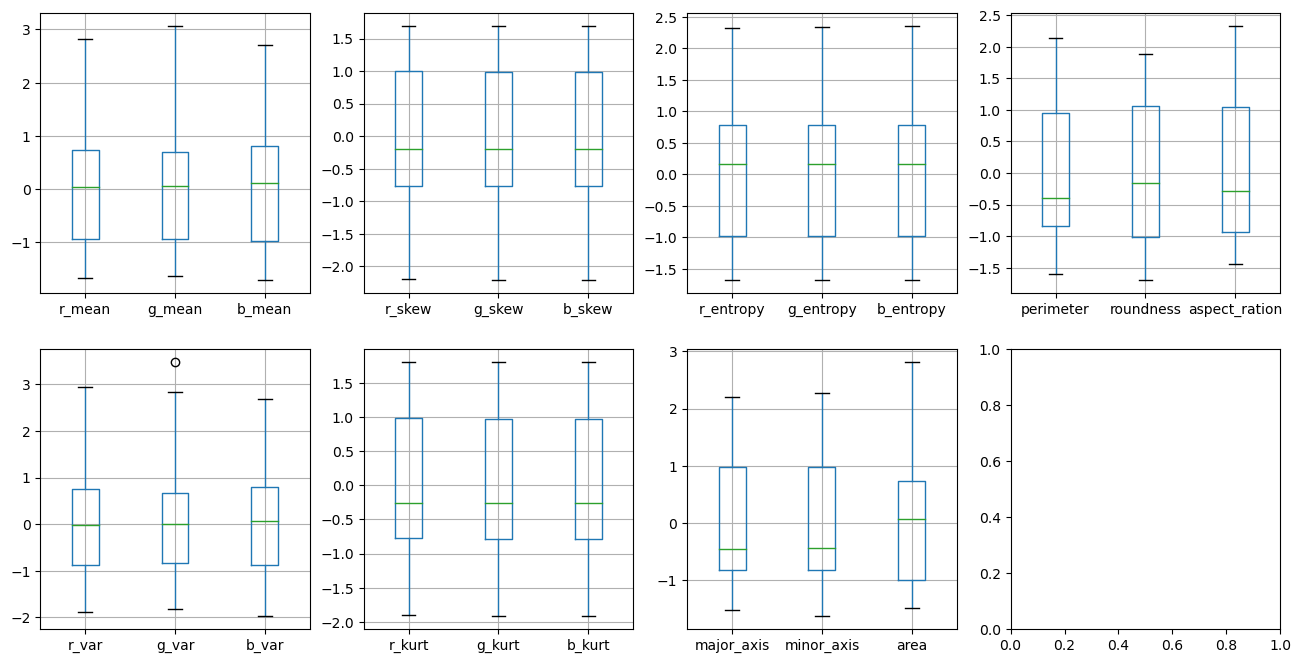

In [5]:
# Plot a boxplot of each feature
features_list = [['r_mean', 'g_mean', 'b_mean'],
                 ['r_var', 'g_var', 'b_var'],
                 ['r_skew', 'g_skew', 'b_skew'],
                 ['r_kurt', 'g_kurt', 'b_kurt'],
                 ['r_entropy', 'g_entropy', 'b_entropy'],
                 ['major_axis', 'minor_axis', 'area'],
                 ['perimeter', 'roundness', 'aspect_ration']]


fig, axs = plt.subplots(2, 4, figsize=(16, 8))

for i, features_group in enumerate(features_list):
    features_scaled_df[features_group].boxplot(ax=axs[i%2, i//2])
    #axs[i%2, i//2].set_title(f"{features_group}")


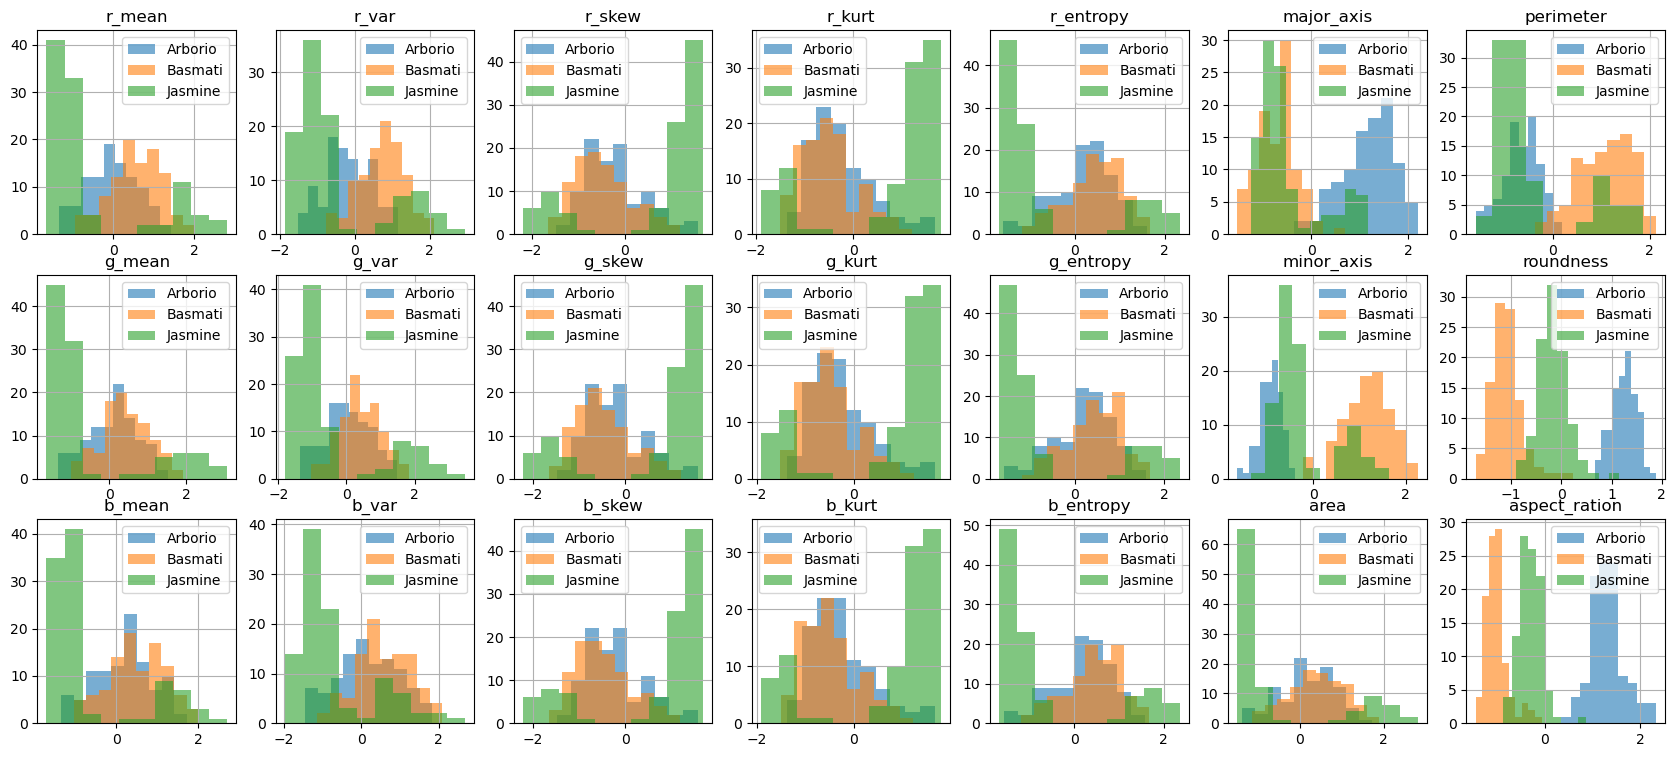

In [6]:
# Plot histogram of each feature, use a different color for each class

label_grouped = features_scaled_df.groupby(['label', 'label_int'])

features_list = np.array(features_list).flatten()

fig, axs = plt.subplots(3, 7, figsize=(21, 9))
for i, feature in enumerate(features_list):
    label_grouped[feature].hist(ax=axs[i%3, i//3], alpha=0.6, bins=10)
    axs[i%3, i//3].set_title(f"{feature}")
    axs[i%3, i//3].legend(['Arborio', 'Basmati', 'Jasmine'])
    


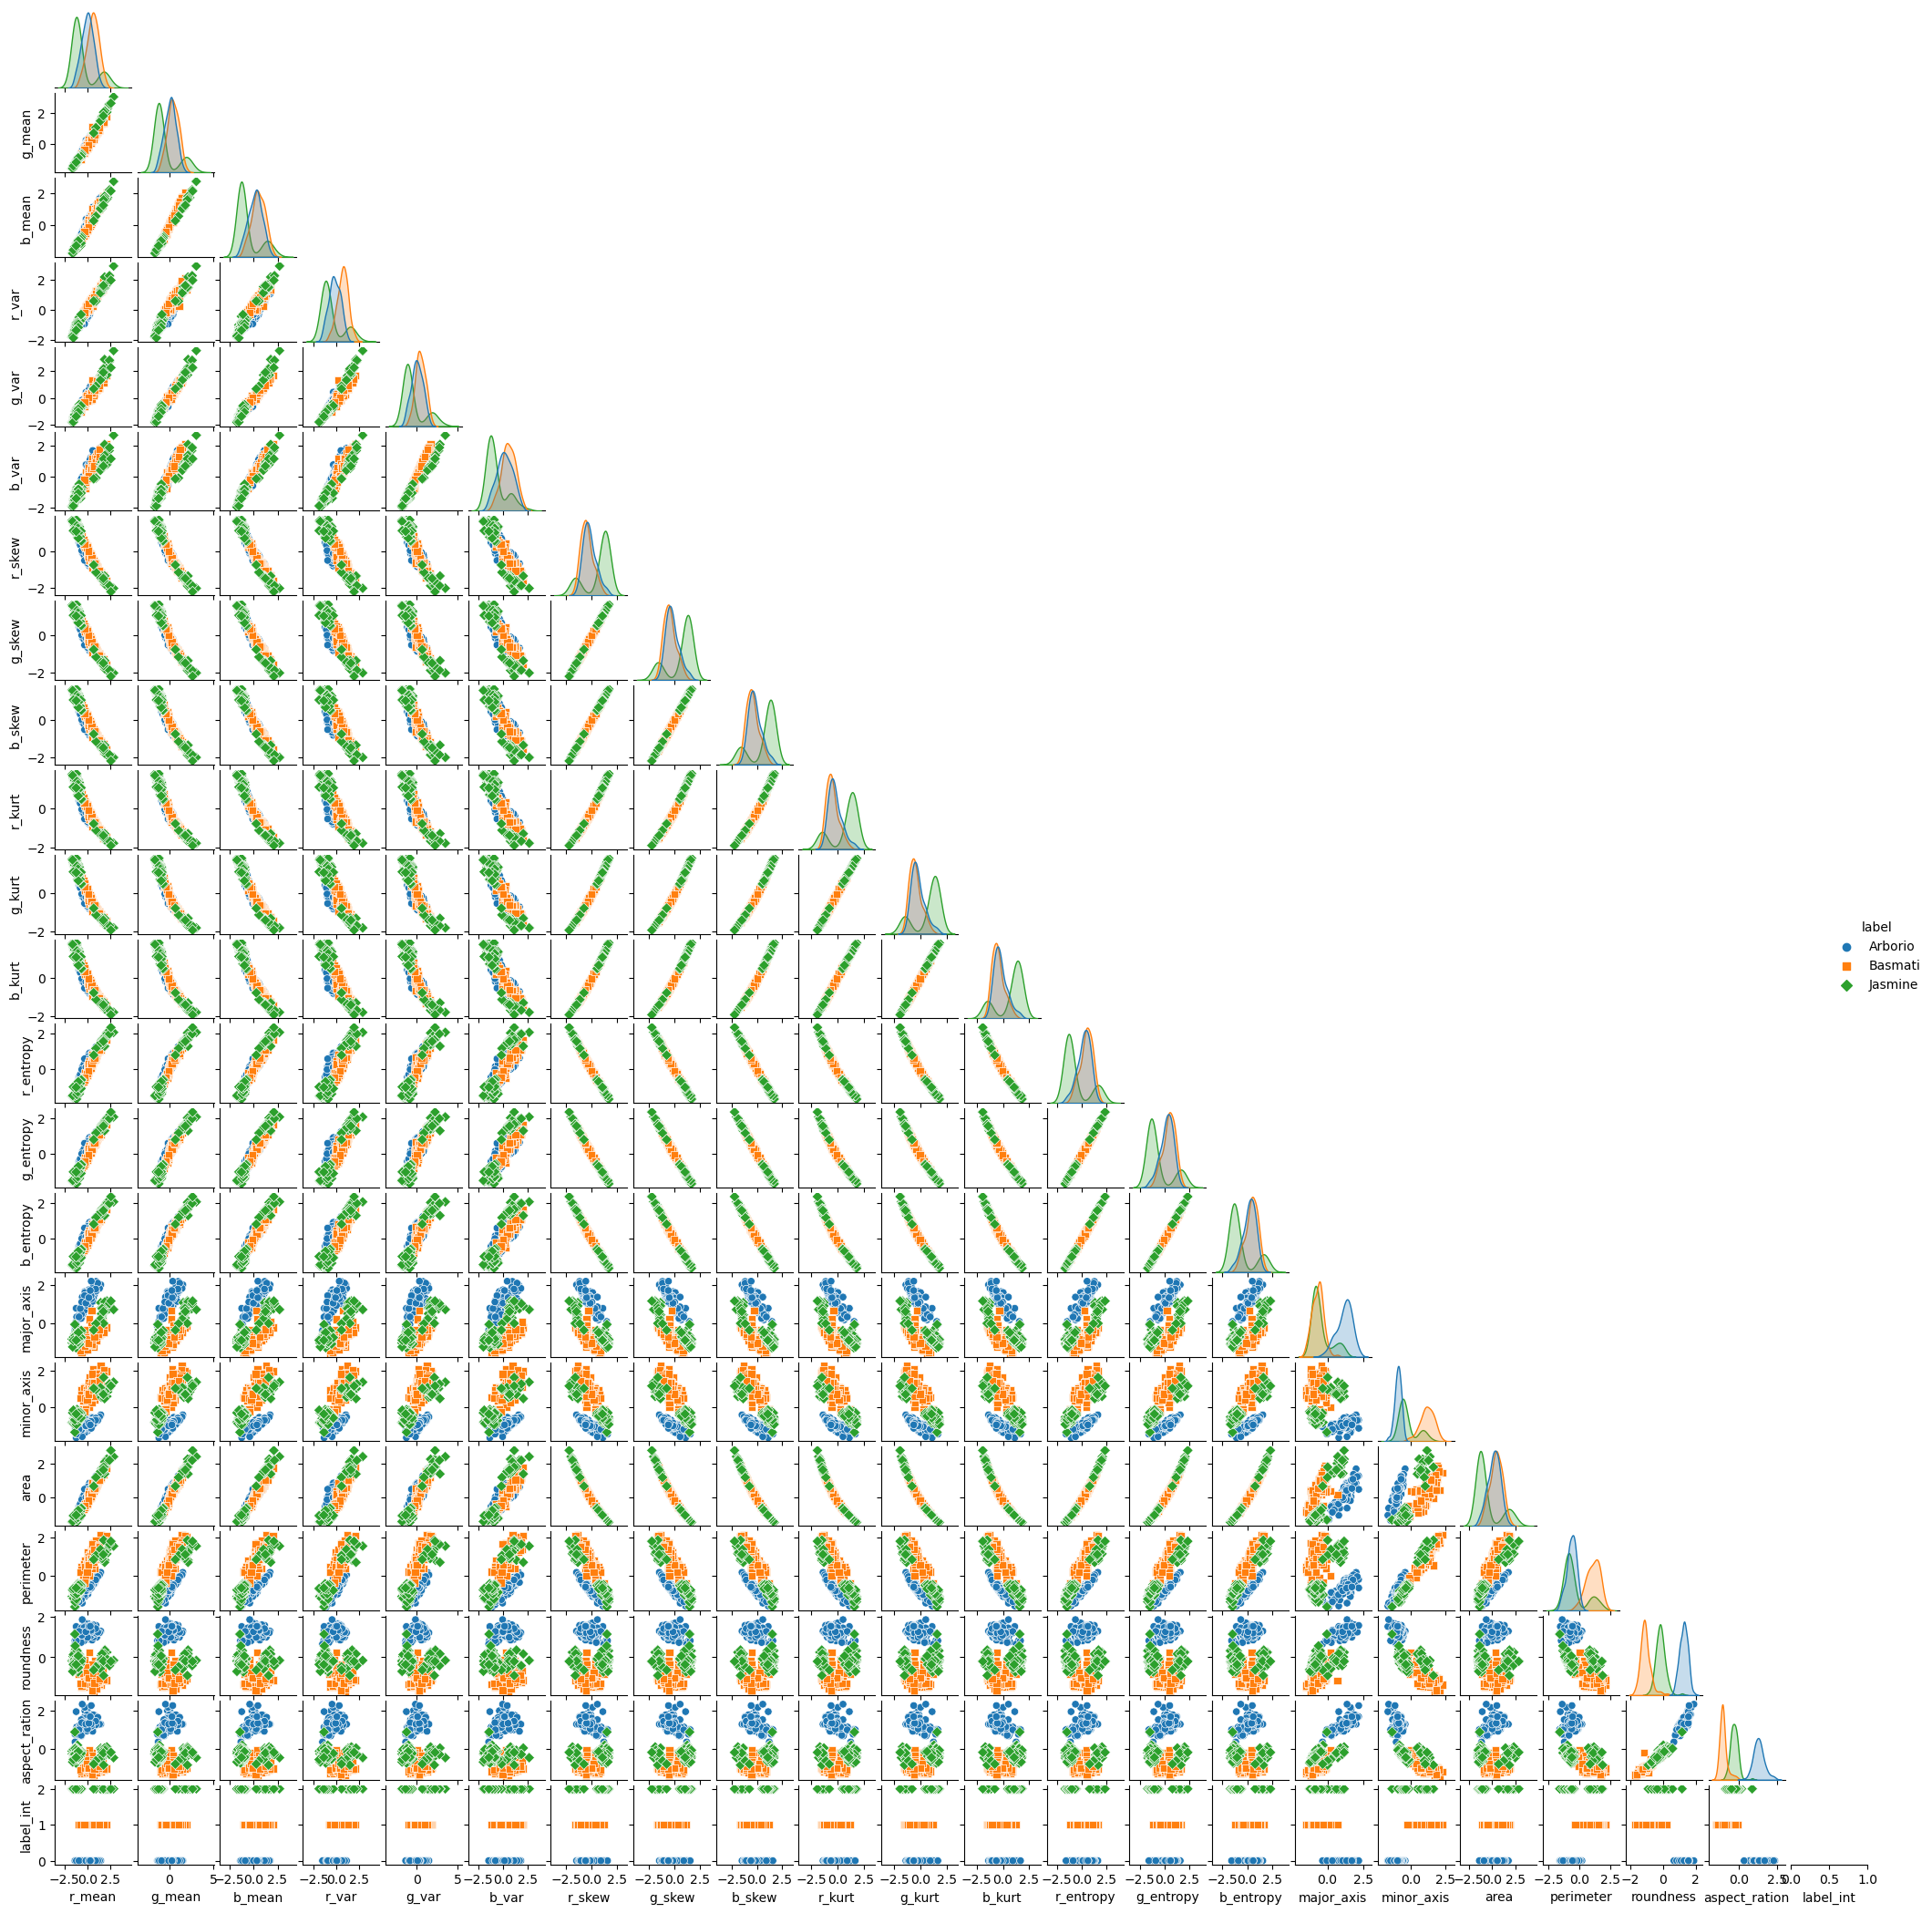

In [7]:
# Plot pariplot (each feature against each feature and the label aginst each feature)
g = sns.pairplot(features_scaled_df, hue='label', corner=True,  markers=["o", "s", "D"])
g.fig.set_size_inches(21,21)

<AxesSubplot: >

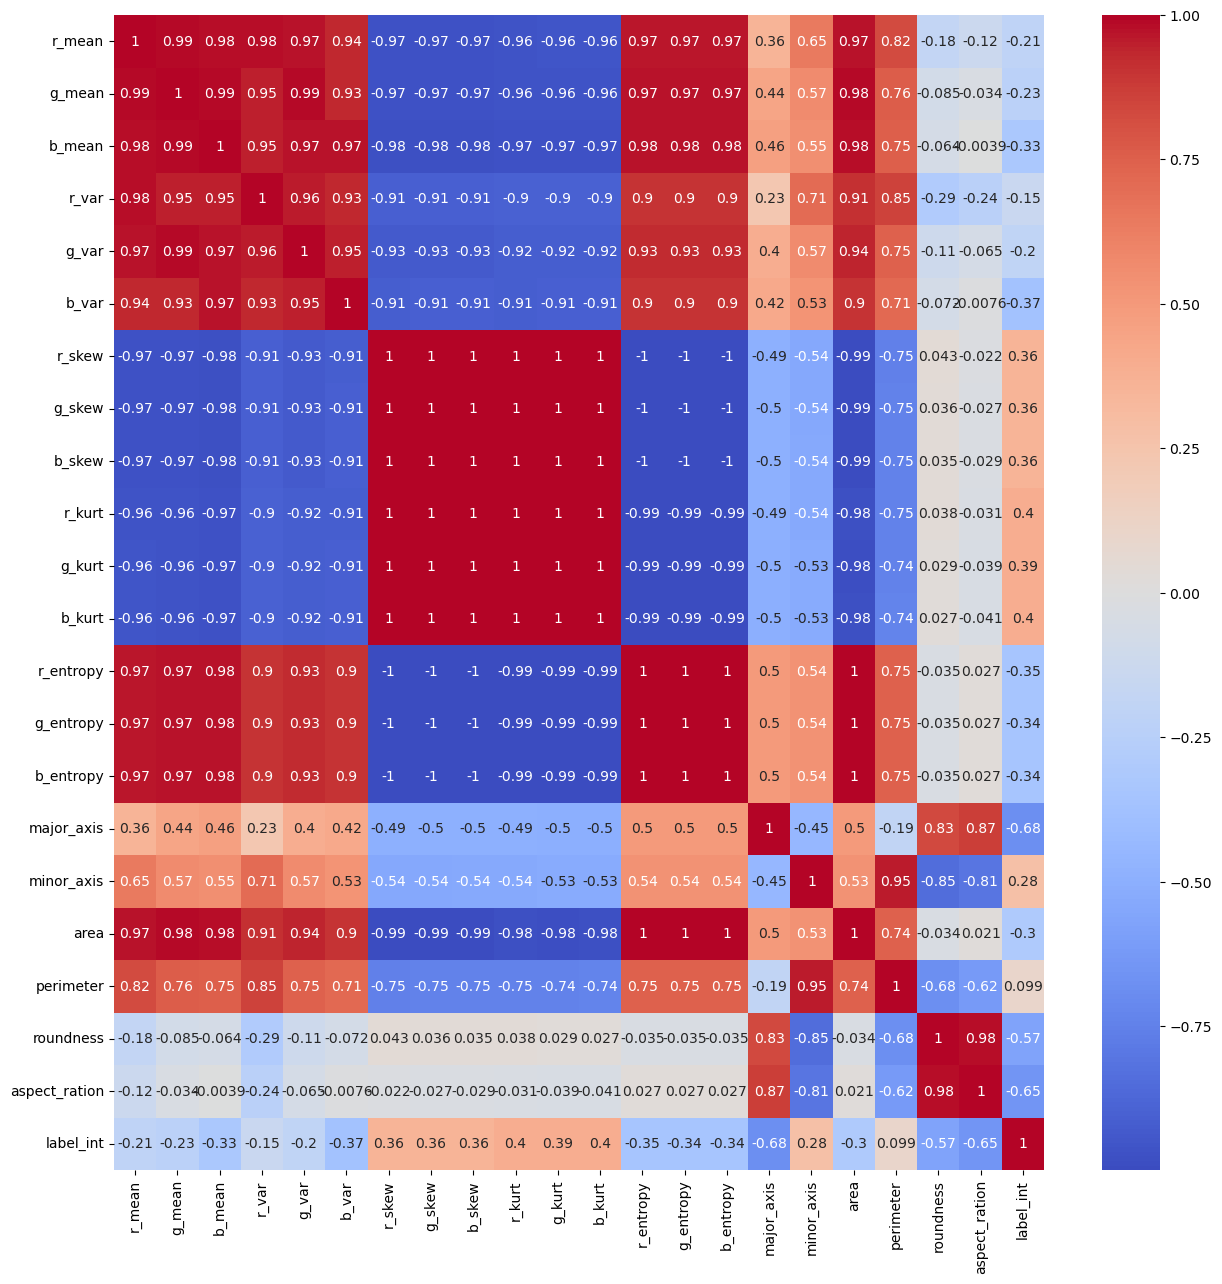

In [8]:
# plot heatmap of the correlation matrix
fig = plt.figure(figsize=(15,15))
sns.heatmap(features_scaled_df.corr(), annot=True, cmap='coolwarm')


Discuss your findings from the above figures. e.g. can you spot features which might be very useful in predicting the correct class

answer: I visualize boxplot, histogram for each features and pairplot, heatmap between features. 

boxplot give us a quick overview of the data distribution, and help us identify any potential outliers. as we can see, our standardized features has general good distribution and almost no outliers need be further investigated. our histograms were colored by rice species, featuers "*roundness*" "*aspect ration*" are signifantly more distinguishable and seperable than others.

as for pairplot plotting, can help detrimine which features have strong or weak relationship, and whether the ralationships are linear or non-linear. our plotting show that most of pariwise features has linear relationship, "*roundness*" "*aspect ration*" "*perimeter*" "*minor axis*" "*major axis*" has relative clear clusters. while the heatmap indicate those stastical fatures(entropy, mean, var, kurt, skewness) has strong internal correlcation.

In general, my good features distrubition can prevent following test learning algorithm from bias, faster convergence, and improved interpretability. features "*area*" "*major axis*" "*minor axis*" "*perimeter*" "*roundness*" "*aspect ration*" those morphological features might be very useful in predicting the correct rice species.




In [9]:
# Fit PCA using two components 
pca = PCA(n_components=2)
pca_df = pd.DataFrame(pca.fit_transform(features_scaled_df.select_dtypes(include=np.float64)), columns=['PC1', 'PC2'])  


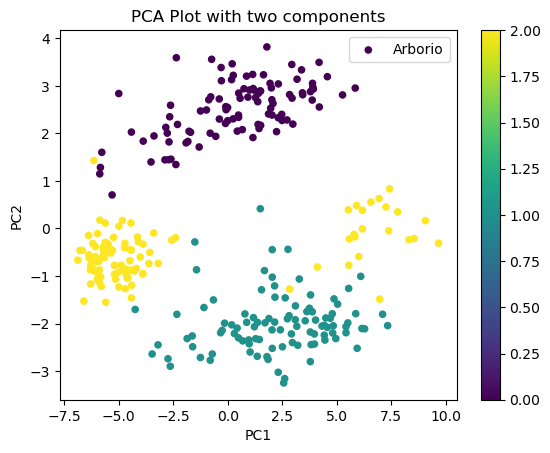

In [10]:
# Plot the PCA figure with two components, color the data points according to their species
pca_df.plot.scatter(x='PC1', y='PC2', c=features_scaled_df['label_int'], colormap='viridis')
plt.title("PCA Plot with two components")
plt.legend(['Arborio', 'Basmati', 'Jasmine'])

Can you see any clusters in PCA? Does this figure give you any clues, how well you will be able to classify the image type? Explain.

answer: from the scatter plot above, we can clearly see there are three clustering centroid, but label "Basmati" has more outliers. 

In [11]:
# How many PCA components are needed to cover 99% of variance?
pca.fit(features_df.select_dtypes(include=np.float64))
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
n_components = np.argmax(cumulative_variance_ratio >= 0.99) + 1

print(f"Cover 99% of variance require {n_components} components")

Cover 99% of variance require 1 components


## Model selection (2 p)

Select the best model for each classifier. Use 5-fold repeated cross validation with 3 repetitions (*RepeatedKFold* from sklearn). You can choose the hyperparameter ranges to use (i.e. from which values the best hyperparameters are selected if they are not stated below.) <br>

- k Nearest Neighbors classifier: hyperparameter k
- random forest: hyperparameters max_depth and max_features
- MLP: use one hidden layer and Early stopping. Hyperparameters:
    - number of neurons in the hidden layer
    - activation function: logistic sigmoid function and rectified linear unit function
    - solver: stochastic gradient descent and adam
    - validation_fraction: 0.1 and 0.5

For each classifier:
- **Report the best hyperparameter or the best combination of hyperparameters.** <br>
- Plot **the accuracy versus the hyperparameter/hyperparameter combination and highlight the best value.** <br>

For random forest model, report the feature importance for each feature. Which features seem to be the most important? Does this correspond with the observations you made in the data exploration? <br>
Ponder the model selection process. What things should be considered when selecting the model to be used?

In [12]:
# 

# prepare training and testing dataframe
x_data = features_scaled_df[features_list]
#x_data = pca_df

y_data = features_scaled_df['label_int']

# Define the cross-validation scheme
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)

print(f"x_data {x_data.shape} y_data {y_data.shape}")

x_data (300, 21) y_data (300,)


### Hyperparameters Selection of k Nearest Neighbors Classifier(1)

Best hyperparameters:  {'n_neighbors': 2}


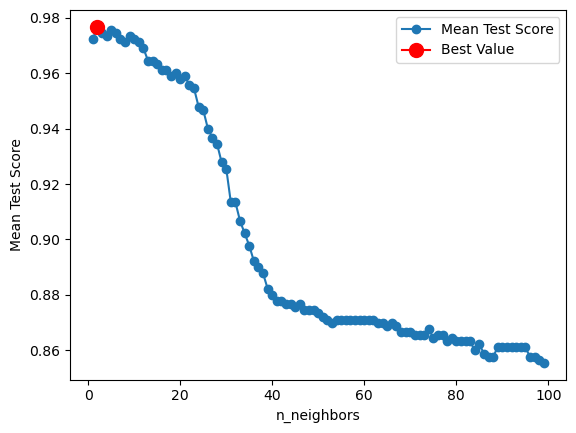

CPU times: total: 7min 30s
Wall time: 59.5 s


In [13]:
%%time 
""" K-nearest neighbors classifier related hyperparameters
'n_neighbors': Increasing the number of neighbors will increase the bias and decrease the variance of the model.
"""
knn_param_grid = {'n_neighbors': range(1, 100)}

# Create a KNN classifier instance with the default hyperparameters
knn = KNeighborsClassifier()

# Use GridSearchCV to perform a grid search over the hyperparameter range
knn_grid_search = GridSearchCV(estimator=knn, param_grid=knn_param_grid, cv=cv, scoring='accuracy')

# Fit the GridSearchCV object to the input features and output variable
knn_grid_search.fit(x_data, y_data)


# Print the best hyperparameters for the KNN classifier
knn_best_params = knn_grid_search.best_params_
print("Best hyperparameters: ",knn_best_params)  # the best 'n_neighbors' trained by PCA data is 4 

# plot cv_results vs n_neighbors 
knn_cv_results = pd.DataFrame(knn_grid_search.cv_results_) 
plt.plot(knn_cv_results['param_n_neighbors'], knn_cv_results['mean_test_score'], marker='o')

plt.plot(knn_best_params['n_neighbors'], knn_cv_results[knn_cv_results['params'] == knn_best_params]['mean_test_score'], marker='o', markersize=10, color='red')

plt.xlabel('n_neighbors')
plt.ylabel('Mean Test Score')
plt.legend(['Mean Test Score', 'Best Value'])
plt.show()

### Hyperparameters selection for  Random Forest Classifier(2)

In [14]:
%time
# Selection of the best hyperparameters for the Random Forest classifier by performing a grid search
"""Forest-related hyperparameters:
'n_estimators': the number of decision tree in the forest. increase the number of trees will increase the accuracy but also increase the training time
'max_depth':  the maximum depth of the tree. A deeper tree can capture more complex relationships in the data, but may also overfit the training data.
'max_features' : the number of features to consider when looking for the best split. Increasing this parameter can increase the diversity of the trees and reduce overfitting.
'min_samples_split(not used)' : The minimum number of samples required to split an internal node. Increasing this parameter can prevent overfitting, but may also result in a model that is too simple.
'min_samples_leaf(not used)' The minimum number of samples required to be at a leaf node. Increasing this parameter can prevent overfitting, but may also result in a model that is too simple.'
'bootstrap'(not used) :  whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.
"""
rfc_param_grid = {'n_estimators': [1, 5, 10, 50, 100, 200],
                        'max_depth': [None, 5, 10, 20],
                        'max_features' : ['auto', 'sqrt', 'log2']}


# crate random forest classifier instance 
rfc = RandomForestClassifier()

# Use GridSearchCV to perform a grid search over the hyperparameter range
rfc_grid_search = GridSearchCV(estimator=rfc, param_grid=rfc_param_grid, cv=cv, scoring='accuracy')

rfc_grid_search.fit(x_data, y_data)

CPU times: total: 0 ns
Wall time: 0 ns


GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=1),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 5, 10, 50, 100, 200]},
             scoring='accuracy')

Best hyperparameters:  {'max_depth': 20, 'max_features': 'auto', 'n_estimators': 10}


<AxesSubplot: xlabel='param_max_features', ylabel='param_n_estimators'>

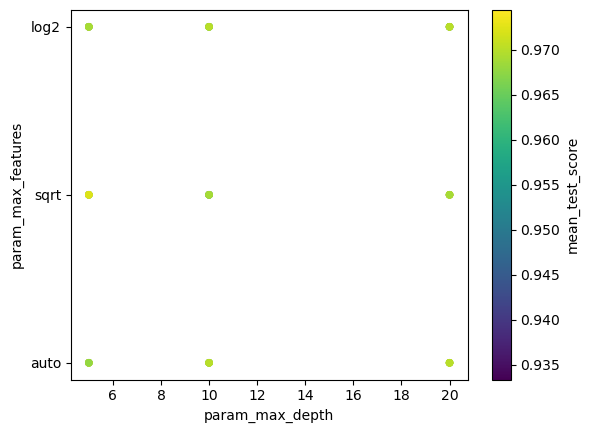

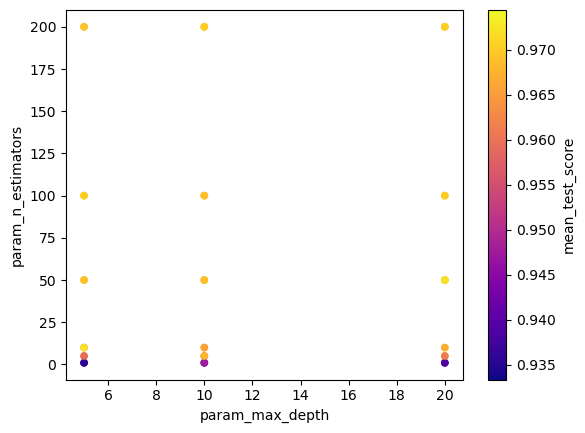

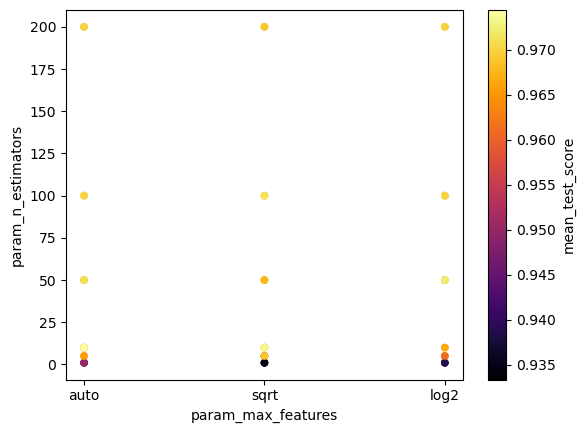

In [15]:
# plotting the mean test score for each combination of hyperparameters

rfc_best_params = rfc_grid_search.best_params_
print("Best hyperparameters: ", rfc_best_params)

rfc_cv_results = pd.DataFrame(rfc_grid_search.cv_results_)

rfc_cv_results.plot.scatter(x='param_max_depth', y='param_max_features', c='mean_test_score', colormap='viridis')
rfc_cv_results.plot.scatter(x='param_max_depth', y='param_n_estimators', c='mean_test_score', colormap='plasma')
rfc_cv_results.plot.scatter(x='param_max_features', y='param_n_estimators', c='mean_test_score', colormap='inferno')


In [16]:
# show important features in descending order
features_importances = rfc.fit(x_data, y_data).feature_importances_
indices = features_importances.argsort()[::-1]
print("Most important features:")
for f in range(x_data.shape[1]):
    print("%d. %s (%f)" % (f + 1, x_data.columns[indices[f]], features_importances[indices[f]]))


Most important features:
1. roundness (0.216188)
2. aspect_ration (0.179413)
3. major_axis (0.106401)
4. minor_axis (0.097012)
5. perimeter (0.081521)
6. g_mean (0.042845)
7. r_kurt (0.027284)
8. r_var (0.025482)
9. r_skew (0.024345)
10. b_skew (0.024145)
11. area (0.022908)
12. b_mean (0.021764)
13. r_entropy (0.020580)
14. b_entropy (0.018470)
15. g_skew (0.017640)
16. g_kurt (0.016314)
17. g_var (0.014943)
18. b_kurt (0.013456)
19. r_mean (0.012886)
20. g_entropy (0.011015)
21. b_var (0.005386)


Comments: <br>
From the features importances list above, we can see 'roundness' 'aspect_ration' 'minor_axis' 'perimeter' 'major_axis' those morphology features contribute most in our random forest classifier, which corresponding to my observation in data explotory part. for this random forest training, the size and quality of the training data should be most considered, especailly the quality(extracted features) is crucial for this traditional machine learning algorithm.

### Hyperparameters selection for Multilayer Preceptron(MLP) (3)

In [17]:
%time
# Selection of the best hyperparameters for the Multilayer Perceptron classifier by performing a grid search
"""Multilayer Perceptron (MLP) classifier related hyperparameters:
'hidden_layer_sizes': the number of neurons in each hidden layer. Increasing the number of neurons will increase the accuracy but also increase the training time.
'activation': the activation function for the hidden layer. The default is 'relu', but 'logistic' and 'tanh' are also common choices.
'solver': the solver for weight optimization. The default is 'adam', but 'sgd' is also a common choice.
'validation_fraction': the proportion of training data to set aside as validation set for early stopping. Increasing this parameter can prevent overfitting, but may also result in a model that is too simple.
"""
mlp_param_grid = {'hidden_layer_sizes': [(10,), (50,), (100,), (200,), (500,)],
                  'activation': ['logistic', 'relu'],
                  'solver': ['sgd', 'adam'],
                  'validation_fraction': [0.1, 0.5]}



mlp = MLPClassifier(early_stopping=True)

mlp_grid_search = GridSearchCV(estimator=mlp, param_grid=mlp_param_grid, cv=cv, scoring='accuracy')

mlp_grid_search.fit(x_data, y_data)


CPU times: total: 0 ns
Wall time: 0 ns


GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=1),
             estimator=MLPClassifier(early_stopping=True),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [(10,), (50,), (100,), (200,),
                                                (500,)],
                         'solver': ['sgd', 'adam'],
                         'validation_fraction': [0.1, 0.5]},
             scoring='accuracy')

Best hyperparameters:  {'activation': 'relu', 'hidden_layer_sizes': (500,), 'solver': 'adam', 'validation_fraction': 0.5}


(Text(0.5, 0, 'solver'), Text(0, 0.5, 'validation_fraction'))

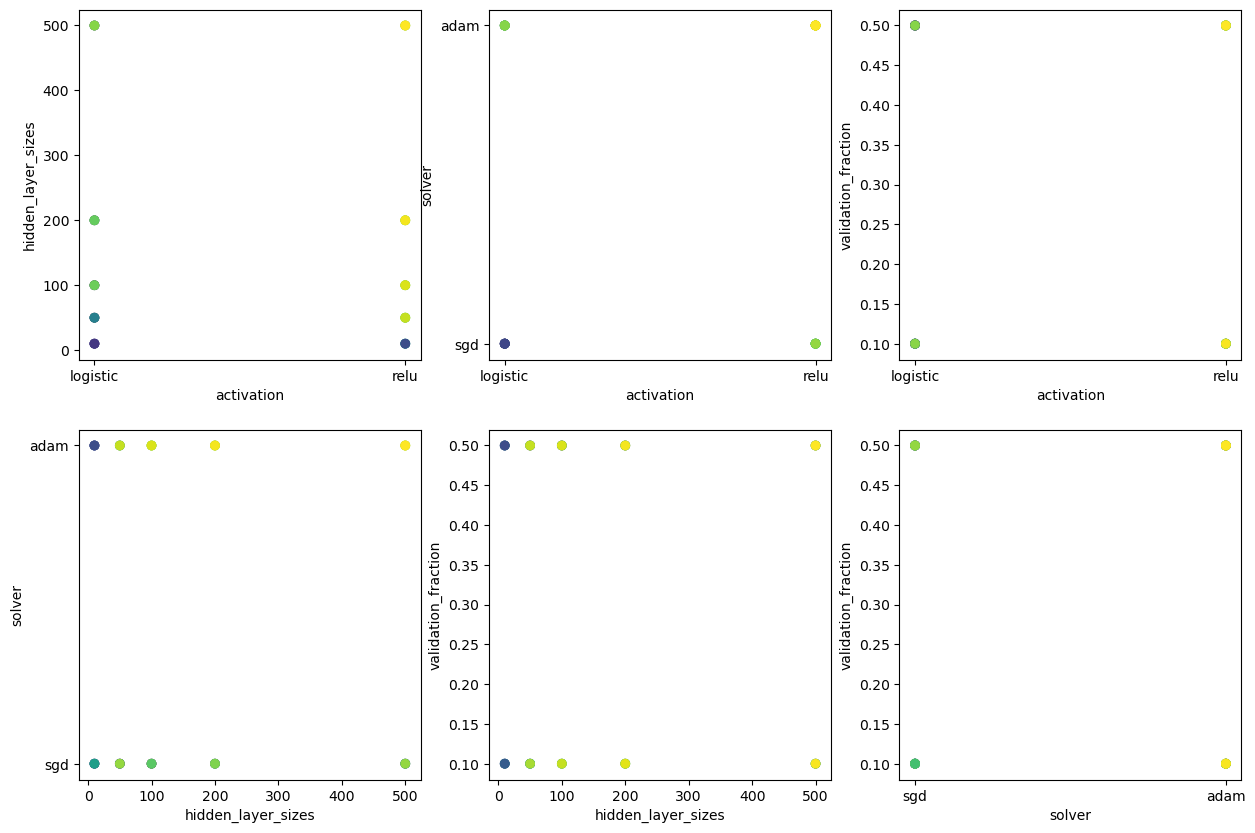

In [18]:
# Print the best hyperparameters for the MLP classifier
mlp_best_params = mlp_grid_search.best_params_
print("Best hyperparameters: ", mlp_best_params)

mlp_cv_results = pd.DataFrame(mlp_grid_search.cv_results_)

# extract hidden layer sizes tuple into list 
param_hidden_layer_sizes = [item[0] for item in mlp_cv_results['param_hidden_layer_sizes']]

# plotting hyperparameters combinations vs mean test score
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

axs[0][0].scatter(mlp_cv_results['param_activation'], param_hidden_layer_sizes, c=mlp_cv_results['mean_test_score'], cmap='viridis')b
axs[0][0].set_xlabel('activation'), axs[0][0].set_ylabel('hidden_layer_sizes')
axs[0][1].scatter(mlp_cv_results['param_activation'], mlp_cv_results['param_solver'], c=mlp_cv_results['mean_test_score'], cmap='viridis')
axs[0][1].set_xlabel('activation'), axs[0][1].set_ylabel('solver')
axs[0][2].scatter(mlp_cv_results['param_activation'], mlp_cv_results['param_validation_fraction'], c=mlp_cv_results['mean_test_score'], cmap='viridis')
axs[0][2].set_xlabel('activation'), axs[0][2].set_ylabel('validation_fraction')
axs[1][0].scatter(param_hidden_layer_sizes, mlp_cv_results['param_solver'], c=mlp_cv_results['mean_test_score'], cmap='viridis')
axs[1][0].set_xlabel('hidden_layer_sizes'), axs[1][0].set_ylabel('solver')
axs[1][1].scatter(param_hidden_layer_sizes, mlp_cv_results['param_validation_fraction'], c=mlp_cv_results['mean_test_score'], cmap='viridis')
axs[1][1].set_xlabel('hidden_layer_sizes'), axs[1][1].set_ylabel('validation_fraction')
axs[1][2].scatter(mlp_cv_results['param_solver'], mlp_cv_results['param_validation_fraction'], c=mlp_cv_results['mean_test_score'], cmap='viridis')
axs[1][2].set_xlabel('solver'), axs[1][2].set_ylabel('validation_fraction')
